### VADER

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import re
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from time import time
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

In [2]:
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Training set

In [3]:
columns = ['','text_no_tag', 'label', 'length']

df = pd.read_csv('finalvalid.csv',
                     header = 0, 
                     usecols = [1,2], 
                     names=columns,
                     encoding ='ISO-8859-1')

In [4]:
df.head(10)

,text_no_tag,label
0,i didnt mean knee high i ment in lengt it goes...,1
1,rt @USER : ppl who say sex is over rated is nt...,1
2,rt @USER : you do not have to ruin the beautif...,1
3,"listening to the "" new age "" station on @USER ...",1
4,@USER welcome to twitter xx,1
5,@USER so twitpic it lol,1
6,rt @USER : i flip ( in ) love @USER ! follow t...,1
7,rt + awesome twitter tips to become a pro @UR...,1
8,@USER i was thinking that i wanna make a cake ...,1
9,@URL check it out ! in the middle of london ! ...,1


In [5]:
df.tail(10)

,text_no_tag,label
788,@USER u lie it was dumb as shit ! the only thi...,0
789,i am so mad at the upper marlboro court system...,0
790,@USER hahaahaha ! our cake looks like one big ...,0
791,rt @USER : ha ! rt @USER : mickey rourke is at...,0
792,rip big when i die i wanna go to hell cuz i am...,0
793,rt @USER : raise ur hand if you used to steal ...,0
794,@USER nd you been callin me outta my name so t...,0
795,that movie was crazy ! depressing an action !,0
796,oh no ! god . little layla ! rt @USER : la...,0
797,never by tea at schiphol airport,0


In [6]:
print("negative tweets:", len(df[df['label']==0]))
print("positive tweets:", len(df[df['label']==1]))

negative tweets: 295
positive tweets: 503


#### Apply VADER

In [7]:
%time   #to calulate the time it takes the algorithm to compute a VADER score

i=0 #counter

compval1 = [ ]  #empty list to hold our computed 'compound' VADER scores


while (i<len(df)):

    k = analyser.polarity_scores(df.iloc[i]['text_no_tag'])
    compval1.append(k['compound'])
    
    i = i+1
    
#converting sentiment values to numpy for easier usage

compval1 = np.array(compval1)

len(compval1)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.72 µs


798

In [9]:
df['VADER_score'] = compval1

In [10]:
df.tail()

,text_no_tag,label,VADER_score
793,rt @USER : raise ur hand if you used to steal ...,0,0.0000
794,@USER nd you been callin me outta my name so t...,0,-0.5423
795,that movie was crazy ! depressing an action !,0,-0.6792
796,oh no ! god . little layla ! rt @USER : la...,0,0.4374
797,never by tea at schiphol airport,0,0.0000


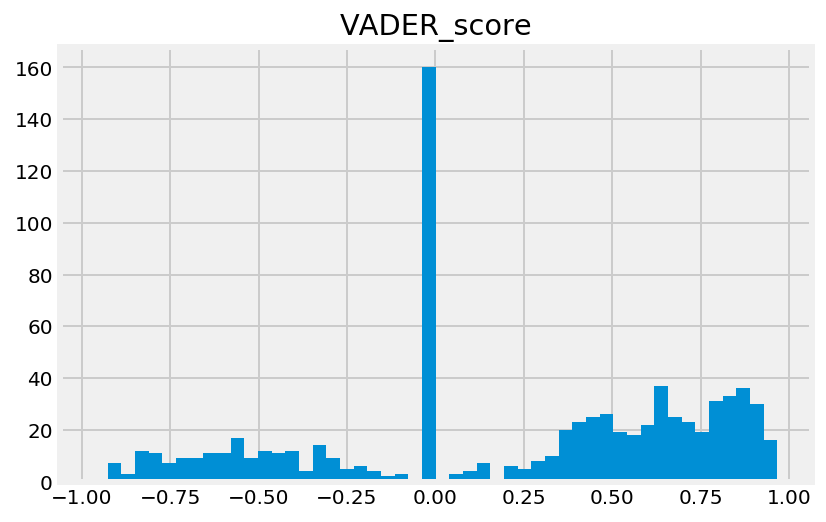

In [11]:
df.hist('VADER_score', bins = 50)
plt.savefig('VADER_valid.png',bbox_inches="tight")
plt.show()

In [12]:
scores_train = df['VADER_score'].tolist()
y_train = df['label'].tolist()
list(zip(scores_train,y_train))

[(0.8637, 1),
 (-0.0258, 1),
 (0.7889, 1),
 (0.0, 1),
 (0.4588, 1),
 (0.4703, 1),
 (0.938, 1),
 (0.6249, 1),
 (0.6996, 1),
 (0.595, 1),
 (0.0, 1),
 (0.5242, 1),
 (0.0, 1),
 (0.0, 1),
 (0.7769, 1),
 (0.4939, 1),
 (0.8957, 1),
 (0.5949, 1),
 (0.34, 1),
 (0.8516, 1),
 (0.0, 1),
 (0.6369, 1),
 (-0.1531, 1),
 (0.6369, 1),
 (0.4404, 1),
 (0.7717, 1),
 (0.4561, 1),
 (0.8999, 1),
 (0.7088, 1),
 (0.8122, 1),
 (0.4019, 1),
 (0.3278, 1),
 (-0.0516, 1),
 (0.5574, 1),
 (0.831, 1),
 (0.6249, 1),
 (0.1295, 1),
 (0.6705, 1),
 (0.0, 1),
 (0.3612, 1),
 (0.7003, 1),
 (0.7772, 1),
 (0.0, 1),
 (0.8035, 1),
 (0.7424, 1),
 (0.5255, 1),
 (0.5106, 1),
 (0.9633, 1),
 (0.7263, 1),
 (0.7249, 1),
 (0.0, 1),
 (0.8221, 1),
 (0.8981, 1),
 (0.7955, 1),
 (0.8268, 1),
 (0.7146, 1),
 (0.6833, 1),
 (0.4215, 1),
 (0.0, 1),
 (0.8472, 1),
 (0.5719, 1),
 (0.0, 1),
 (0.6908, 1),
 (-0.1689, 1),
 (0.7269, 1),
 (0.0, 1),
 (0.68, 1),
 (0.9201, 1),
 (0.0, 1),
 (0.7096, 1),
 (0.6696, 1),
 (0.3818, 1),
 (0.891, 1),
 (0.632, 1),
 (0.3

#### Save csv

In [14]:
df.to_csv('VADER_valid.csv')

In [13]:
pd.set_option('float_format', '{:f}'.format)

In [14]:
df.describe()

,label,VADER_score
count,798.000000,798.000000
mean,0.630326,0.224134
std,0.483019,0.525148
min,0.000000,-0.964800
25%,0.000000,0.000000
50%,1.000000,0.361200
75%,1.000000,0.670500
max,1.000000,0.966400


In [15]:
df['VADER_score'].count()

798

In [16]:
df['VADER_binary'] = df['VADER_score'].apply(lambda x: 0 if x<0 else 1)

In [17]:
df.head()

,text_no_tag,label,VADER_score,VADER_binary
0,i didnt mean knee high i ment in lengt it goes...,1,0.863700,1
1,rt @USER : ppl who say sex is over rated is nt...,1,-0.025800,0
2,rt @USER : you do not have to ruin the beautif...,1,0.788900,1
3,"listening to the "" new age "" station on @USER ...",1,0.000000,1
4,@USER welcome to twitter xx,1,0.458800,1


In [19]:
y_true = df['label']
y_true.tolist()
y_pred_vader = df['VADER_binary']
y_pred_vader.tolist()

print("accuracy score: ", accuracy_score(y_true,y_pred_vader))
print("precision score: ", precision_score(y_true,y_pred_vader))
print("recall score ", recall_score(y_true,y_pred_vader))
print("f1 score: ", f1_score(y_true,y_pred_vader))

accuracy score:  0.8070175438596491
precision score:  0.7874794069192751
recall score  0.9502982107355865
f1 score:  0.8612612612612612
